In [1]:
import numpy as np
from PIL import Image
import skimage.measure
import pandas as pd

# View the images

In [2]:
img_kilns = Image.open('./road_kiln_house_delhi.jpeg')

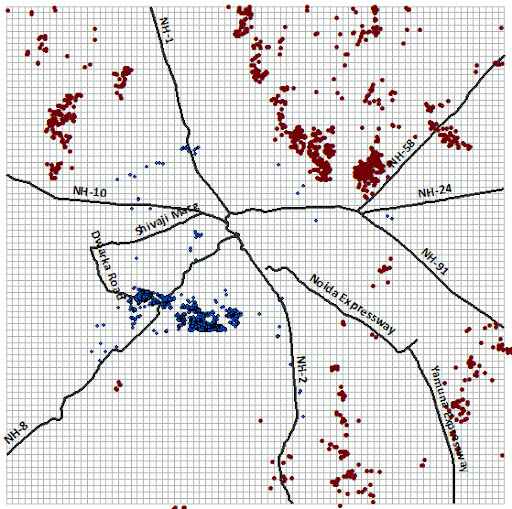

In [3]:
img_kilns

In [4]:
img_industry = Image.open('./road_industry_airport_delhi.jpeg')

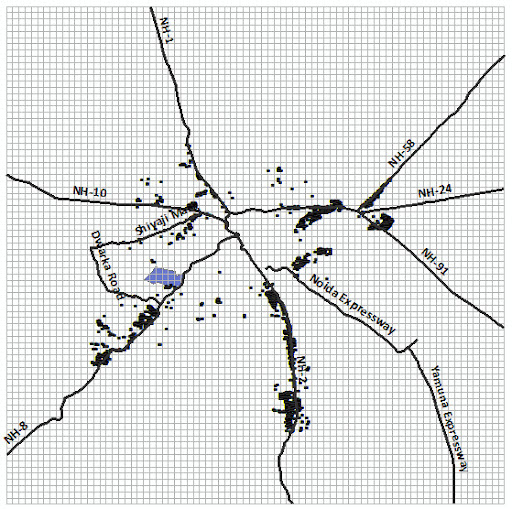

In [5]:
img_industry

In [6]:
img_green = Image.open('./road_green_water_delhi.jpeg')

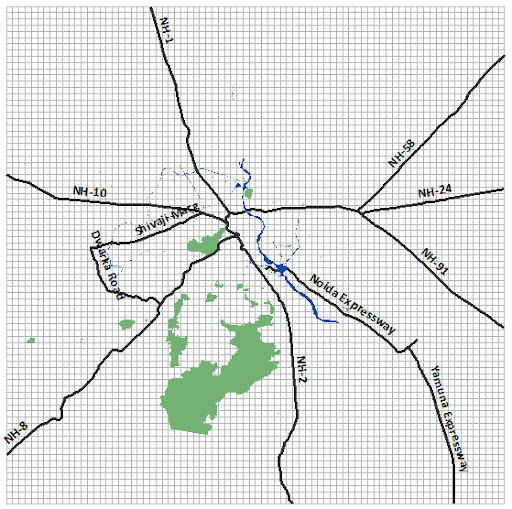

In [7]:
img_green

# Image border correction

In [8]:
arr_kilns = np.array(img_kilns)
arr_industry = np.array(img_industry)
arr_green = np.array(img_green)

In [9]:
arr_kilns = np.array(Image.fromarray(arr_kilns[5:505,5:505,:]).resize((480,480)))
arr_industry = np.array(Image.fromarray(arr_industry[5:505,5:505,:]).resize((480,480)))
arr_green = np.array(Image.fromarray(arr_green[5:505,5:505,:]).resize((480,480)))

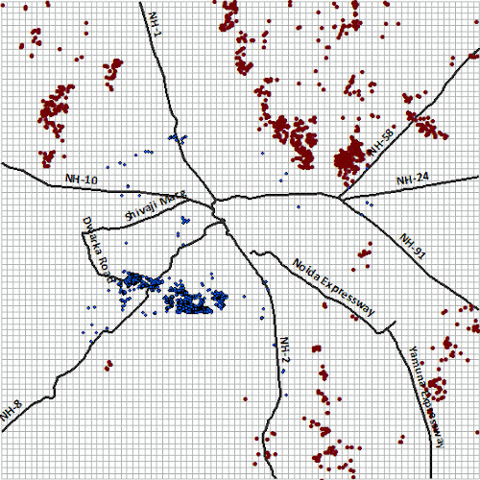

In [10]:
Image.fromarray(arr_kilns)

# Count and position red pixels in kilns image

In [11]:
def is_pixel_red(px_val):
    assert(len(px_val) == 3)
    if(px_val[0]>3*max(px_val[1],px_val[2])):
        return(1)
    else:
        return(0)

In [12]:
is_pixel_red_arr = np.empty((arr_kilns.shape[0],arr_kilns.shape[1]))
for i in range(arr_kilns.shape[0]):
    for j in range(arr_kilns.shape[1]):
        is_pixel_red_arr[i][j] = is_pixel_red(arr_kilns[i][j].astype(int))

In [13]:
kilns_cells = skimage.measure.block_reduce(is_pixel_red_arr, (6,6), np.sum)

In [14]:
kilns_cells.shape

(80, 80)

In [15]:
np.save('brick_kilns_80x80.npy',kilns_cells)

# Remove road and airport from industry image

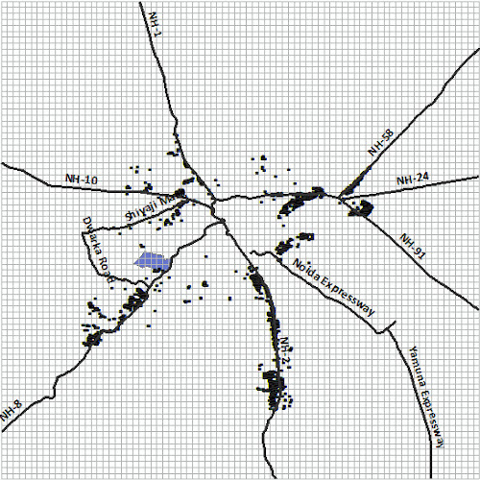

In [16]:
Image.fromarray(arr_industry)

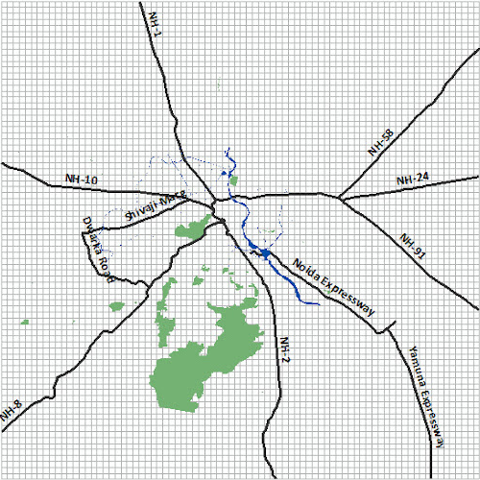

In [17]:
Image.fromarray(arr_green)

In [18]:
def is_pixel_same(px_val1, px_val2):
    diff = np.sum(abs(px_val1-px_val2))
    if(diff<20):
        return(1)
    else:
        return(0)

In [19]:
arr_industry_only = np.empty((arr_industry.shape[0],arr_industry.shape[1],arr_industry.shape[2])).astype(np.uint8)
for i in range(arr_industry.shape[0]):
    for j in range(arr_industry.shape[1]):
        if(is_pixel_same(arr_industry[i][j].astype(int),arr_green[i][j].astype(int))):
            arr_industry_only[i][j] = np.array([255,255,255]).astype(np.uint8)
        else:
            arr_industry_only[i][j] = arr_industry[i][j].astype(np.uint8)

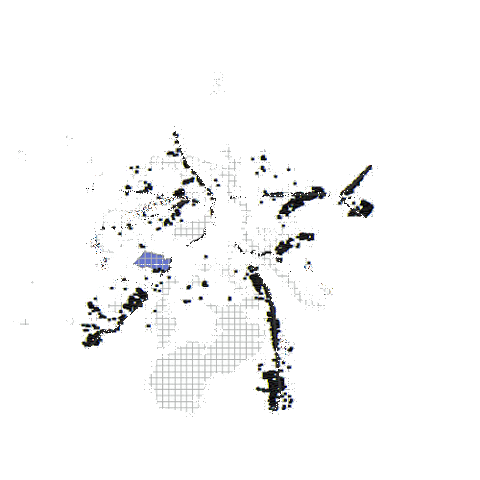

In [20]:
Image.fromarray(arr_industry_only)

# Count and Position Black Pixels

In [21]:
def is_pixel_black(px_val):
    if(np.sum(px_val)<100):
        return(1)
    else:
        return(0)

In [22]:
is_pixel_black_arr = np.empty((arr_industry_only.shape[0],arr_industry_only.shape[1]))
for i in range(arr_industry_only.shape[0]):
    for j in range(arr_industry_only.shape[1]):
        is_pixel_black_arr[i][j] = is_pixel_black(arr_industry_only[i][j].astype(int))

In [23]:
industry_cells = skimage.measure.block_reduce(is_pixel_black_arr, (6,6), np.sum)

In [24]:
industry_cells.shape

(80, 80)

In [25]:
np.save('industries_80x80.npy', industry_cells)

# Power plants

In [31]:
df_pp = pd.read_csv('./power_plants.csv')

In [32]:
pp_cells = np.zeros((80,80))
for idx, row in df_pp.iterrows():
    lat = row.Latitude
    i = int((lat-28.2)/0.01)+1
    long = row.Longitude
    j = int((long-77.85)/0.01)+1
    pp_cells[i][j] = row.Power

In [33]:
np.save('power_plants_80x80.npy', pp_cells)

In [36]:
df_pp['Power'].sum()/df_pp['Old_Power'].sum()

0.8707482993197279